In [1]:
# Dont forget to import variable defined in load_data.py
from load_data import train_dl,val_dl
import torch
from torchvision.models.segmentation import deeplabv3_resnet101

Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar


In [2]:
# The pre-trained models have been trained on a subset of COCO train2017

model = deeplabv3_resnet101(pretrained=True,num_classes=21)
#device = torch.device('cpu')
#model = model.to(device)

In [4]:
# Deploy
from torch import nn

model.eval()
with torch.no_grad():
    
    # (xb, yb) are loaded automatically from the data loader
    for xb,yb in val_dl:
        yb_pred = model(xb)
        print(type(yb_pred))
        print(yb_pred.keys())
        yb_pred = yb_pred["out"].cpu()
        print(yb_pred.shape)
        
        yb_pred = torch.argmax(yb_pred,dim=1)
        break
        
print(yb_pred.shape)

<class 'collections.OrderedDict'>
odict_keys(['out', 'aux'])
torch.Size([8, 21, 520, 520])
torch.Size([8, 520, 520])


In [52]:
print(yb_pred.type)
print(xb.shape)

<built-in method type of Tensor object at 0x7fa6823d1140>
torch.Size([8, 3, 520, 520])


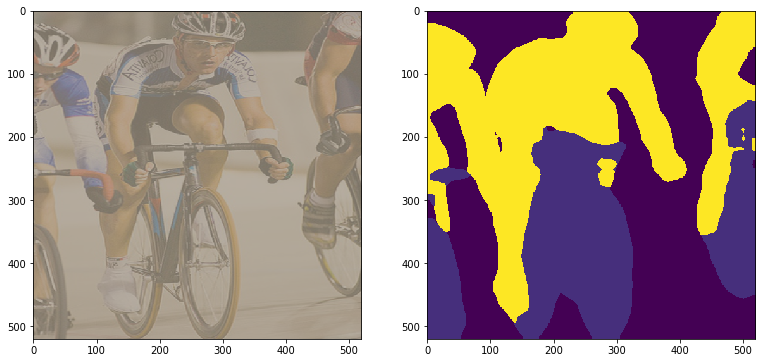

In [42]:
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
from show_test import re_normalize,show_img_target

plt.figure(figsize=(20,20))
img = xb[4]
mask = yb_pred[4]
img_r = re_normalize(img)

plt.subplot(1,3,1)
img_r = to_pil_image(img_r)
plt.imshow(img_r)

plt.subplot(1,3,2)
plt.imshow(mask)
